In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("spacex_launch_dash.csv")

In [4]:
df.head()

,Unnamed: 0,Flight Number,Launch Site,class,Payload Mass (kg),Booster Version,Booster Version Category
0,0,1,CCAFS LC-40,0,0.0,F9 v1.0 B0003,v1.0
1,1,2,CCAFS LC-40,0,0.0,F9 v1.0 B0004,v1.0
2,2,3,CCAFS LC-40,0,525.0,F9 v1.0 B0005,v1.0
3,3,4,CCAFS LC-40,0,500.0,F9 v1.0 B0006,v1.0
4,4,5,CCAFS LC-40,0,677.0,F9 v1.0 B0007,v1.0


In [18]:
# 1. Crear rangos personalizados de masa de carga útil
bins = [0, 1000, 2000, 3000, 4000, 5000, 6000, df['Payload Mass (kg)'].max()]
labels = ['0-1k', '1k-2k', '2k-3k', '3k-4k', '4k-5k', '5k-6k', '6k+']

bins2 = [0, 2000, 4000, 6000, 8000, df['Payload Mass (kg)'].max()]
labels2 = ['0-2k', '2k-4k', '4k-6k', '6k-8k', '8k+']

df['PayloadRange'] = pd.cut(df['Payload Mass (kg)'], bins=bins, labels=labels)

In [19]:
# 2. Calcular tasa de éxito por rango
success_rate_by_range = df.groupby('PayloadRange')['class'].mean()

C:\Users\joang\AppData\Local\Temp\ipykernel_29524\2422340637.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  success_rate_by_range = df.groupby('PayloadRange')['class'].mean()


C:\Users\joang\AppData\Local\Temp\ipykernel_29524\263297103.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=success_rate_by_range.index, y=success_rate_by_range.values, palette='Blues_d')


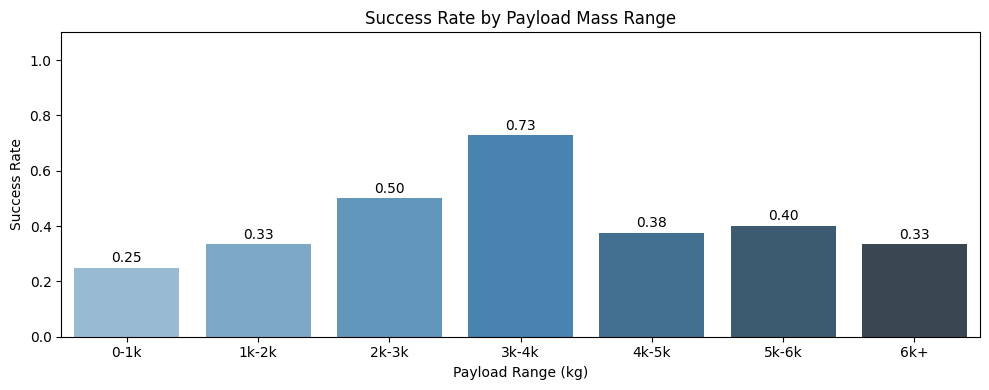

In [20]:
# 3. Dibujar gráfico de barras
plt.figure(figsize=(10, 4))
sns.barplot(x=success_rate_by_range.index, y=success_rate_by_range.values, palette='Blues_d')

# Añadir etiquetas encima de cada barra
for i, val in enumerate(success_rate_by_range.values):
    plt.text(i, val + 0.01, f"{val:.2f}", ha='center', va='bottom')

# Personalizar gráfico
plt.title('Success Rate by Payload Mass Range')
plt.xlabel('Payload Range (kg)')
plt.ylabel('Success Rate')
plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()